In [3]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.info()

print("\nShape:", df.shape)

print("\nMissing values:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB

Shape: (159571, 8)

Missing values:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


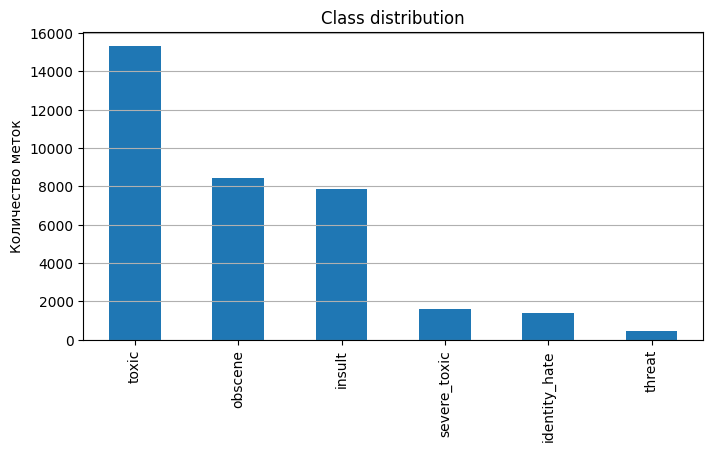

In [5]:
import matplotlib.pyplot as plt

class_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df[class_cols].sum().sort_values(ascending=False).plot(kind='bar', figsize=(8, 4), title="Class distribution")
plt.ylabel("Количество меток")
plt.grid(axis='y')
plt.show()


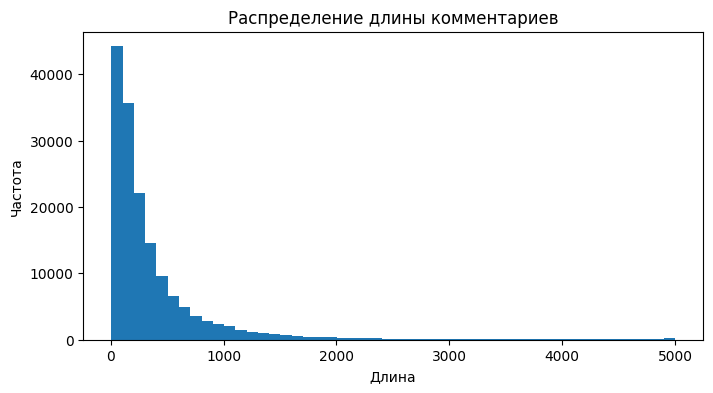

In [6]:
df['comment_len'] = df['comment_text'].apply(len)

df['comment_len'].hist(bins=50, figsize=(8, 4))
plt.title("Распределение длины комментариев")
plt.xlabel("Длина")
plt.ylabel("Частота")
plt.grid()
plt.show()


In [7]:
print("\nПримеры токсичных комментариев:")
print(df[df['toxic'] == 1]['comment_text'].sample(3).values)

print("\nПримеры нетоксичных комментариев:")
print(df[df[class_cols].sum(axis=1) == 0]['comment_text'].sample(3).values)



Примеры токсичных комментариев:
['Tard, my IP changes every time I reset my router. Your a wiki Nazi.'
 "I notice that you added Cheri DiNovo's name to the list short story contributors at the New Yorker Magazine article. Would you care to mention a single short story she contributed to that magazine? What issue(s)? You can't because you are lying. You gay NDP supporters have real problems with the concept of truth"
 'you animalfucker get a life / Chairmanofall']

Примеры нетоксичных комментариев:
['Uhh, its refering to his father.  (talk•contribs)'
 'Page move request Ohio State University -> The Ohio State University \n\nGood afternoon, after a week of discussion on the talk page, there is a consensus that the page should be moved. No opposing comments were submitted. Thank you.'
 '"\n\n Re Andrew Skolnick\'s Cerebral Meltdown \n\n If everyone is onboard, please use the text/link to MMY\'s Bhagavad-Gita that I several weeks ago created and inserted into the MMY article (it didn\'t h